In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("netflix.csv",lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
#check for null values:-
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [5]:
#check for duplicate values:-
df.duplicated().sum()

np.int64(0)

In [6]:
#exploring the dataset.
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Data Cleaning

In [7]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [8]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


 Dropping Overview, Original_Languege and Poster-Url

In [10]:
# making list of column to be dropped
# cols = ['Overview', 'Original_Language', 'Poster_Url']
# df.drop(cols,axis=1,inplace=True)
# df.head()

In [11]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.

In [12]:
import pandas as pd

def categorize_col(df, col, labels):
    """
    Categorizes a numeric column based on its quartiles.

    Args:
        df (pd.DataFrame): DataFrame being processed.
        col (str): Column to be categorized.
        labels (list): List of category labels from min to max.

    Returns:
        pd.DataFrame: Updated DataFrame with the categorized column.
    """
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]

    df[col + '_category'] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df


In [13]:
# Define the labels for quartiles
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Apply the function to the 'Vote_Average' column
df = categorize_col(df, 'Vote_Average', labels)

# Confirm changes
print(df['Vote_Average_category'].unique())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,below_avg
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,popular
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,average


In [15]:
df['Vote_Average_category'].value_counts()

Vote_Average_category
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

We'd split genres into a list and then
explode our dataframe to have only one
genre per row for each movie

In [16]:
df.isnull().sum()

Release_Date               0
Title                      0
Overview                   0
Popularity                 0
Vote_Count                 0
Vote_Average               0
Original_Language          0
Genre                      0
Poster_Url                 0
Vote_Average_category    100
dtype: int64

In [17]:
dt=df
# split the strings into lists
dt['Genre'] = dt['Genre'].str.split(', ')
# explode the lists
dt = dt.explode('Genre').reset_index(drop=True)
dt.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular


In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25793 non-null  int32   
 1   Title                  25793 non-null  object  
 2   Overview               25793 non-null  object  
 3   Popularity             25793 non-null  float64 
 4   Vote_Count             25793 non-null  int64   
 5   Vote_Average           25793 non-null  float64 
 6   Original_Language      25793 non-null  object  
 7   Genre                  25793 non-null  object  
 8   Poster_Url             25793 non-null  object  
 9   Vote_Average_category  25552 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(5)
memory usage: 1.7+ MB


In [19]:
dt.nunique()

Release_Date              102
Title                    9513
Overview                 9822
Popularity               8160
Vote_Count               3266
Vote_Average               74
Original_Language          43
Genre                      19
Poster_Url               9827
Vote_Average_category       4
dtype: int64

In [20]:
#Showing stats for each column.

In [21]:
df['Genre'].describe()

count        9827
unique       2337
top       [Drama]
freq          466
Name: Genre, dtype: object

What is the most frequent Genre in the datset?

C:\Users\prakh\AppData\Local\Temp\ipykernel_228\1884068257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dt['Genre'],palette='viridis')


Text(0.5, 0, 'No. of movies')

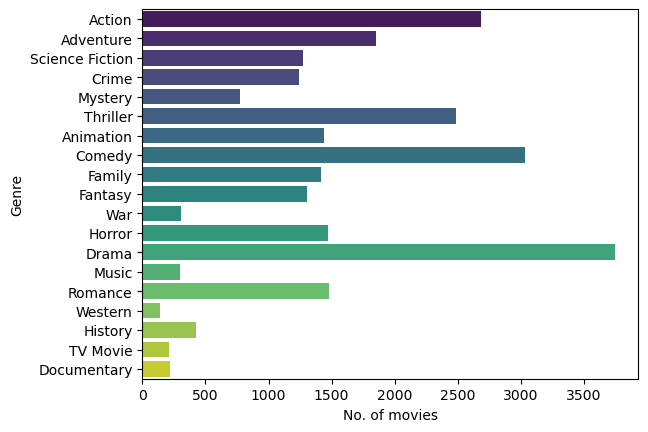

In [47]:
sns.countplot(y=dt['Genre'],palette='viridis')
plt.xlabel("No. of movies")

What genres has highest votes ?

In [24]:
dt.groupby("Genre")['Vote_Count'].sum()

Genre
Action             4868675
Adventure          4313869
Animation          1525045
Comedy             3933497
Crime              1980261
Documentary          38224
Drama              5141495
Family             2046625
Fantasy            2521940
History             527056
Horror             1448486
Music               297446
Mystery            1181275
Romance            1803756
Science Fiction    2850476
TV Movie             68441
Thriller           3631594
War                 448918
Western             186860
Name: Vote_Count, dtype: int64

C:\Users\prakh\AppData\Local\Temp\ipykernel_228\1407855112.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y=dt['Genre'],x=dt['Vote_Count'],ci=None,data=dt,palette='magma')
C:\Users\prakh\AppData\Local\Temp\ipykernel_228\1407855112.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dt['Genre'],x=dt['Vote_Count'],ci=None,data=dt,palette='magma')


Text(0.5, 0, 'Vote_count')

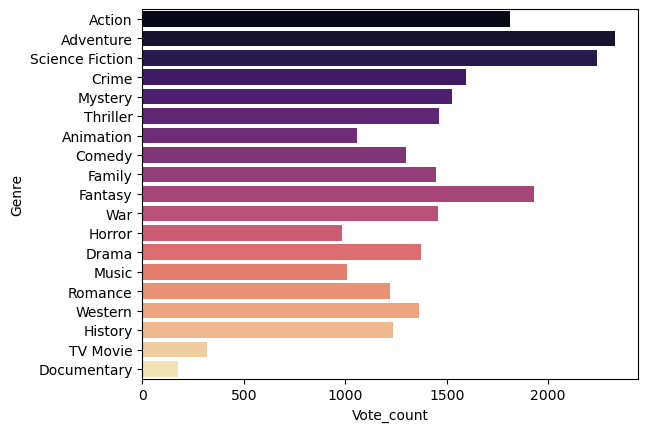

In [48]:
sns.barplot(y=dt['Genre'],x=dt['Vote_Count'],ci=None,data=dt,palette='magma')
plt.xlabel("Vote_count")

What movie got the highest popularity ? what's its
genre ?


In [41]:
top=df.sort_values("Popularity",ascending=False).head(10)[['Title','Popularity']]

In [42]:
top

,Title,Popularity
0,Spider-Man: No Way Home,5083.954
1,The Batman,3827.658
2,No Exit,2618.087
3,Encanto,2402.201
4,The King's Man,1895.511
5,The Commando,1750.484
6,Scream,1675.161
7,Kimi,1601.782
8,Fistful of Vengeance,1594.013
9,Eternals,1537.406


C:\Users\prakh\AppData\Local\Temp\ipykernel_228\879746171.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top['Title'],x=top['Popularity'],palette='rainbow')


<Axes: xlabel='Popularity', ylabel='Title'>

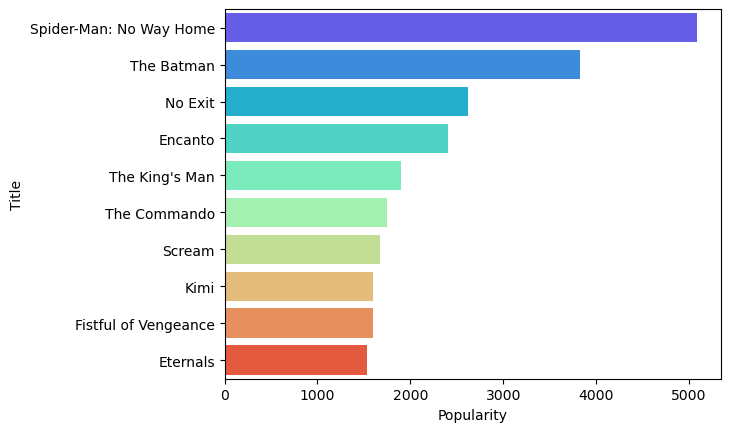

In [46]:
sns.barplot(y=top['Title'],x=top['Popularity'],palette='rainbow')

Which year has the most filmmed movies?

In [54]:
max=df['Release_Date'].value_counts().head()

C:\Users\prakh\AppData\Local\Temp\ipykernel_228\4035832165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max.index,y=max.values,palette='viridis')


<Axes: xlabel='Release_Date'>

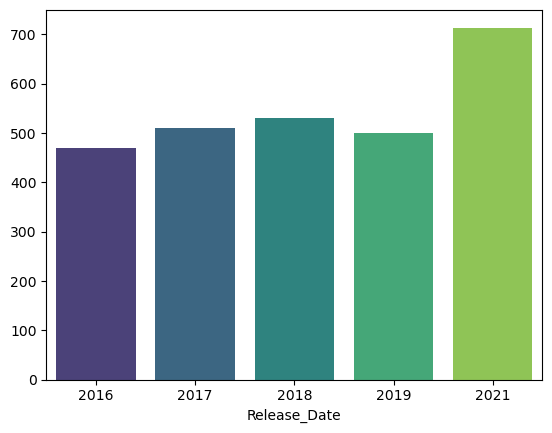

In [56]:
sns.barplot(x=max.index,y=max.values,palette='viridis')

How many unique movies are there in the dataset?

In [57]:
df.shape[0]

9827

Which genres appear most frequently in the dataset?

In [59]:
dt['Genre'].value_counts().head(1)

Genre
Drama    3744
Name: count, dtype: int64

In [60]:
dt['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

What is the average vote (Vote_Average) across all movies?

In [65]:
df['Vote_Average'].mean()

np.float64(6.439533937112038)

Which original languages are most common in the dataset?

In [68]:
df['Original_Language'].value_counts().head()

Original_Language
en    7570
ja     645
es     339
fr     292
ko     170
Name: count, dtype: int64

What are the top 5 most voted movies (by Vote_Count)?

In [71]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,below_avg
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,popular
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,average


In [73]:
df.groupby("Title")["Vote_Count"].sum().head()

Title
#Alive                          1210
#AnneFrank. Parallel Stories      35
#realityhigh                     943
(500) Days of Summer            8198
*batteries not included          534
Name: Vote_Count, dtype: int64

What is the average popularity of movies per genre?

In [74]:
dt.groupby("Genre")['Popularity'].mean()

Genre
Action             50.890133
Adventure          53.742888
Animation          52.433848
Comedy             37.873669
Crime              44.747295
Documentary        29.235377
Drama              30.077651
Family             46.610616
Fantasy            53.081342
History            28.395827
Horror             38.264498
Music              33.771410
Mystery            40.093590
Romance            30.866030
Science Fiction    49.511334
TV Movie           29.954715
Thriller           42.946258
War                35.298075
Western            36.187912
Name: Popularity, dtype: float64

Which movies have the highest and lowest Vote_Average?

In [81]:
df.sort_values("Vote_Average",ascending=False).head()[['Title','Vote_Average']]

,Title,Vote_Average
9391,Kung Fu Master Huo Yuanjia,10.0
7339,Franco Escamilla: Por La Anécdota,9.2
667,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,9.1
2325,Impossible Things,9.1
7014,Sex School: Dorms of Desire,9.0


In [82]:
df.sort_values("Vote_Average",ascending=True).head()[['Title','Vote_Average']]

,Title,Vote_Average
8659,Panama,0.0
80,Sonic the Hedgehog 2,0.0
4814,My Mother the State,0.0
4708,Last Man,0.0
4787,X,0.0


Identify the movies with multiple genres and list them

In [85]:
def singleGenre(list):
    if(len(list)>1):
        return len(list)
    else:
        return 1

In [89]:
df['No.of genre']=df['Genre'].apply(singleGenre)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category,No.of genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular,3
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular,3
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,below_avg,1
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,popular,4
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,average,4


In [91]:
df[df['No.of genre']==1]['Title']

2                       No Exit
7                          Kimi
9                      Eternals
16      Texas Chainsaw Massacre
17                   The Requin
                 ...           
9805               Black Sunday
9808              Viva l'Italia
9814            The Kite Runner
9816      The Atticus Institute
9823           Violent Delights
Name: Title, Length: 1615, dtype: object

Which movies are available in English only?

In [92]:
df[df['Original_Language']=='en']['Title']

0                    Spider-Man: No Way Home
1                                 The Batman
2                                    No Exit
3                                    Encanto
4                             The King's Man
                        ...                 
9821                       The Little Prince
9822                                Badlands
9824                            The Offering
9825    The United States vs. Billie Holiday
9826                                 Threads
Name: Title, Length: 7570, dtype: object

What are the most common combinations of genres (before exploding)?

In [97]:
lap=df['Genre'].value_counts().head()

In [102]:
lap

Genre
[Drama]               466
[Comedy]              403
[Drama, Romance]      248
[Horror]              238
[Horror, Thriller]    199
Name: count, dtype: int64